<a href="https://colab.research.google.com/github/PRAGYAMISHRA04/MACHINE-LEARNING-WITH-COURSERA/blob/main/NON_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hello!!

### This program is written by Pragya Mishra

### For practising non linear regression and some preprocessing skills

### Dataset has been downloaded from kaggle.com 

# Question: " PREDICT THE PRICE OF A CAR "

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r'C:\Users\pragy\Desktop\car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
data=data.dropna()# dropping NaNs

In [ ]:
A=[]
for i in data.columns:
    #print(i," --- ",data[i].value_counts())
    #print('~'*90)
    D=dict(data[str(i)].value_counts())
    A.append(D)
    del D
A[5]    

{'Petrol': 239, 'Diesel': 60, 'CNG': 2}

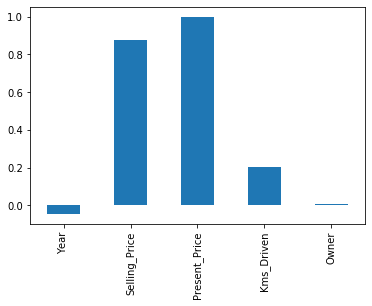

In [ ]:
C=pd.DataFrame(data.corr())
C['Present_Price'].plot(kind='bar')

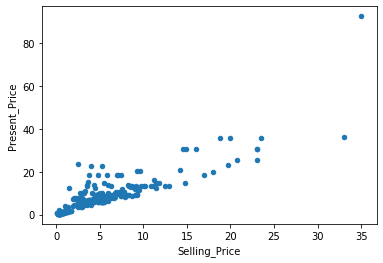

In [ ]:
X='Selling_Price'
Y='Present_Price'
data.plot.scatter(x=X,y=Y,)

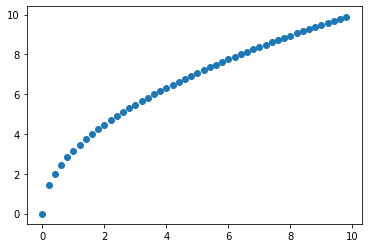

In [ ]:
from math import *
x=np.arange(0,10,0.2)
y=(10*x)**(1/2)
plt.scatter(x,y)
plt.show()

## Now we got the graph to be fitted 
## finding the error function
## ydat -   (ax)^1/2
## squaring the errror and summing
## Ey^2 + E (ax) -  E 2y(ax)^1/2
## parameter is a=10
## partially differnentiating function with respect to a
## equating it to 0 or using steepest descent method
## ai+1=ai-f(ai)/df(ai)

In [ ]:
data.groupby('Car_Name')
data.groupby('Car_Name')

#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test=train_test_split(xdat,ydat,test_size=0.2)'''

In [ ]:
def fun(x,y,a=10):
    y2=sum(list(y**2))
    ax=a*sum(list(x))
    yax=2*a**(1/2)*sum(list(y*x**(1/2)))
    f=y2+ax-yax
    return f
def differfun(xdat,ydat,a):
    x=sum(list(xdat))
    yxhalf=sum(ydat*xdat**(1/2))
    dsqrfun=x-(a**(-1/2))*yxhalf
    f=fun(xdat,ydat)
    return [dsqrfun,f,a]
ydat=data['Present_Price']
xdat=data['Selling_Price']
a=20
def steepdes(xdat,ydat,a):
        a0=a
        a1=a0
        Gamma=0.5
        gradf,f,a=differfun(xdat,ydat,a0)
        for i in range(1000):
                gradf,f,a=differfun(xdat,ydat,a0)  
                a1=a0-0.1*f/gradf
                a0=a1
                print(a1," ~~~~~~ ",gradf)
        return a1

In [ ]:
anew=steepdes(X_train,Y_train,200)

198.52801781069468  ~~~~~~  723.7389395719835
197.05328489498666  ~~~~~~  722.3889949219912
195.575754758596  ~~~~~~  721.0213873262094
194.09537958333664  ~~~~~~  719.6357021928802
192.61211017375763  ~~~~~~  718.2315106593187
191.1258959009882  ~~~~~~  716.8083689383045
189.63668464360555  ~~~~~~  715.3658176268596
188.1444227253302  ~~~~~~  713.9033809747841
186.6490548493388  ~~~~~~  712.4205661101216
185.1505240289666  ~~~~~~  710.9168622184775
183.6487715145548  ~~~~~~  709.3917396728641
182.1437367161771  ~~~~~~  707.8446491104582
180.63535712195844  ~~~~~~  706.2750204523475
179.12356821167464  ~~~~~~  704.682261862
177.6083033652956  ~~~~~~  703.065758637815
176.08949376610593  ~~~~~~  701.4248720346926
174.5670682980045  ~~~~~~  699.7589380091138
173.0409534365504  ~~~~~~  698.0672658816999
171.5110731332833  ~~~~~~  696.3491369106755
169.97734869280407  ~~~~~~  694.6038027690295
168.43969864205434  ~~~~~~  692.8304839174837
166.89803859118157  ~~~~~~  691.0283678646142
165.3

(-32.186777158844045+39.916849720912275j)  ~~~~~~  (773.2381754588991+655.9919108100244j)
(-32.99328429077926+40.59089634588235j)  ~~~~~~  (777.6997295337126+649.9705423242913j)
(-33.804913571421004+41.259400225726736j)  ~~~~~~  (782.0394200973283+644.1319935044137j)
(-34.62143732565438+41.92244083753927j)  ~~~~~~  (786.2616633227701+638.4669295796998j)
(-35.4426403607231+42.58009948606929j)  ~~~~~~  (790.3707190166292+632.9666558802644j)
(-36.26831922656207+43.23245877725559j)  ~~~~~~  (794.3706905494344+627.6230651724894j)
(-37.098281514780986+43.879602164716246j)  ~~~~~~  (798.2655261337288+622.4285898385134j)
(-37.93234519602566+44.52161356017837j)  ~~~~~~  (802.0590211523644+617.3761584302346j)
(-38.77033799497858+45.15857699987822j)  ~~~~~~  (805.7548212930781+612.4591561727832j)
(-39.6120968019196+45.79057635990032j)  ~~~~~~  (809.3564262898793+607.671389033439j)
(-40.457467119526655+46.41769511426244j)  ~~~~~~  (812.8671941086529+603.0070510095636j)
(-41.306302543434285+47.0400

(-127.72017800404763+92.01536288206718j)  ~~~~~~  (961.5591037138254+392.482521164068j)
(-128.6701688292941+92.40170701347894j)  ~~~~~~  (962.2628421688429+391.33493931489016j)
(-129.62044960132192+92.78676759451527j)  ~~~~~~  (962.9586209046373+390.19773628401686j)
(-130.57101550488963+93.17055704625226j)  ~~~~~~  (963.6465758787423+389.07075210318914j)
(-131.52186183512913+93.55308759561798j)  ~~~~~~  (964.3268399510184+387.953830312059j)
(-132.47298399433862+93.93437127949582j)  ~~~~~~  (964.999542971557+386.84681785820504j)
(-133.4243774888879+94.31441994872073j)  ~~~~~~  (965.6648118656112+385.7495650006542j)
(-134.37603792623125+94.69324527197168j)  ~~~~~~  (966.3227707156689+384.6619252167615j)
(-135.32796101202374+95.07085873956345j)  ~~~~~~  (966.9735408407813+383.5837551123127j)
(-136.2801425473367+95.44727166714071j)  ~~~~~~  (967.6172408732505+382.51491433471415j)
(-137.2325784259684+95.82249519927741j)  ~~~~~~  (968.2539868327796+381.45526548914677j)
(-138.185264631846+96.

(-228.48197602527617+127.24969342885427j)  ~~~~~~  (1008.0855207590165+309.3351758622608j)
(-229.44789557664924+127.54547926989488j)  ~~~~~~  (1008.3626826334178+308.7828626439014j)
(-230.41389098842424+127.84068153549936j)  ~~~~~~  (1008.6379032846353+308.2335491397987j)
(-231.37996151348528+128.13530364054466j)  ~~~~~~  (1008.9112032514009+307.6872079157252j)
(-232.34610641494962+128.42934896698748j)  ~~~~~~  (1009.1826027817997+307.1438118915792j)
(-233.31232496598858+128.72282086430323j)  ~~~~~~  (1009.452121838416+306.60333433547015j)
(-234.27861644965236+129.01572264991776j)  ~~~~~~  (1009.7197801033703+306.0657488579244j)
(-235.24498015869847+129.30805760963162j)  ~~~~~~  (1009.9855969832494+305.53102940621005j)
(-236.21141539542387+129.59982899803722j)  ~~~~~~  (1010.249591613932+304.99915025877687j)
(-237.17792147150055+129.89104003892913j)  ~~~~~~  (1010.5117828653144+304.4700860198086j)
(-238.14449770781462+130.18169392570732j)  ~~~~~~  (1010.7721893459358+303.9438116138866j

(-316.6215090886644+152.11977974724502j)  ~~~~~~  (1027.2596255272927+268.75948255142885j)
(-317.5921671936758+152.37335094239148j)  ~~~~~~  (1027.4189440320695+268.3991904145223j)
(-318.5628603754146+152.62655322581764j)  ~~~~~~  (1027.5774223583583+268.04035985113995j)
(-319.53358837910207+152.87938819660044j)  ~~~~~~  (1027.7350671946247+267.6829809169192j)
(-320.5043509525389+153.13185744234454j)  ~~~~~~  (1027.8918851581166+267.3270437626948j)
(-321.47514784607154+153.38396253929673j)  ~~~~~~  (1028.0478827958116+266.97253863332196j)
(-322.4459788125594+153.63570505245903j)  ~~~~~~  (1028.2030665853524+266.61945586651785j)
(-323.41684360734274+153.88708653570004j)  ~~~~~~  (1028.357442935966+266.26778589172017j)
(-324.38774198821034+154.13810853186516j)  ~~~~~~  (1028.511018189367+265.917519228964j)
(-325.35867371536847+154.38877257288533j)  ~~~~~~  (1028.6637986206497+265.56864648777395j)
(-326.32963855140986+154.63908017988433j)  ~~~~~~  (1028.8157904391626+265.2211583660742j)
(

(-406.0427600706249+174.07757551374237j)  ~~~~~~  (1039.07875853009+240.70049589133805j)
(-407.0158296452482+174.30272107081817j)  ~~~~~~  (1039.1819003657665+240.44240408144225j)
(-407.98891856271695+174.52760798210673j)  ~~~~~~  (1039.284606629274+240.18514746067814j)
(-408.96202671206515+174.7522371347645j)  ~~~~~~  (1039.3868800956666+239.92872150528189j)
(-409.9351539832149+174.9766094109005j)  ~~~~~~  (1039.4887235163535+239.6731217259079j)
(-410.90830026696756+175.2007256876164j)  ~~~~~~  (1039.5901396193524+239.41834366729108j)
(-411.8814654549946+175.424586837046j)  ~~~~~~  (1039.6911311095384+239.16438290791342j)
(-412.8546494398289+175.6481937263946j)  ~~~~~~  (1039.791700668889+238.91123505967437j)
(-413.8278521148557+175.87154721797762j)  ~~~~~~  (1039.891850956728+238.65889576756527j)
(-414.80107337430417+176.09464816925922j)  ~~~~~~  (1039.9915846099632+238.4073607093476j)
(-415.7743131132387+176.31749743289012j)  ~~~~~~  (1040.0909042433252+238.1566255952353j)
(-416.747

(-509.2780200681662+196.65318292494945j)  ~~~~~~  (1048.0267599216281+217.26038502496695j)
(-510.25265779693825+196.85504001677862j)  ~~~~~~  (1048.0956045142439+217.07094281351263j)
(-511.2273067252448+197.05671052284004j)  ~~~~~~  (1048.164212510005+216.8819982592591j)
(-512.2019668013766+197.25819495876874j)  ~~~~~~  (1048.2325851349362+216.69354917687122j)
(-513.1766379739577+197.45949383783292j)  ~~~~~~  (1048.3007236065685+216.505593394479j)
(-514.1513201919429+197.66060767094916j)  ~~~~~~  (1048.3686291340114+216.31812875357102j)
(-515.126013404615+197.86153696669743j)  ~~~~~~  (1048.4363029180265+216.13115310888824j)
(-516.1007175615819+198.06228223133598j)  ~~~~~~  (1048.5037461511001+215.94466432831965j)
(-517.0754326127739+198.2628439688162j)  ~~~~~~  (1048.570960017514+215.75866029279788j)
(-518.0501585084413+198.46322268079723j)  ~~~~~~  (1048.637945693416+215.57313889619726j)
(-519.0248951991518+198.66341886666044j)  ~~~~~~  (1048.7047043468901+215.388098045231j)
(-519.99

(-601.9123755103357+215.06112028558613j)  ~~~~~~  (1053.6569402966406+201.22039381105563j)
(-602.8878850491377+215.2472684260254j)  ~~~~~~  (1053.707803603894+201.07004637607218j)
(-603.8634020547304+215.43327016146512j)  ~~~~~~  (1053.7585170604507+200.92003705106555j)
(-604.838926497775+215.61912583640913j)  ~~~~~~  (1053.809081331737+200.77036456592376j)
(-605.814458349094+215.8048357940139j)  ~~~~~~  (1053.8594970792299+200.6210276572254j)
(-606.7899975796697+215.99040037609586j)  ~~~~~~  (1053.9097649604846+200.47202506819468j)
(-607.7655441606432+216.17581992313865j)  ~~~~~~  (1053.9598856291652+200.3233555486564j)
(-608.7410980633133+216.36109477430045j)  ~~~~~~  (1054.0098597350725+200.17501785499107j)
(-609.7166592591353+216.54622526742116j)  ~~~~~~  (1054.0596879241734+200.0270107500909j)
(-610.69222771972+216.73121173902953j)  ~~~~~~  (1054.1093708386286+199.8793330033159j)
(-611.6678034168326+216.91605452435027j)  ~~~~~~  (1054.1589091168203+199.73198339045015j)
(-612.64338

(-695.5916215488387+232.30888833619045j)  ~~~~~~  (1057.9400325448614+188.1671110660001j)
(-696.5677338738288+232.48238167075837j)  ~~~~~~  (1057.9790638233396+188.04425575469782j)
(-697.543851448659+232.6557564319636j)  ~~~~~~  (1058.0179945843004+187.921641707745j)
(-698.5199742554017+232.82901286238032j)  ~~~~~~  (1058.0568252177968+187.79926813409497j)
(-699.4961022762151+233.00215120375753j)  ~~~~~~  (1058.0955561118594+187.6771342463368j)
(-700.472235493342+233.17517169702288j)  ~~~~~~  (1058.1341876525082+187.55523926067383j)
(-701.4483738891103+233.34807458228656j)  ~~~~~~  (1058.172720223766+187.43358239690235j)
(-702.4245174459313+233.52086009884528j)  ~~~~~~  (1058.211154207672+187.31216287839044j)
(-703.4006661463003+233.693528485186j)  ~~~~~~  (1058.2494899842945+187.19097993205676j)
(-704.3768199727951+233.8660799789898j)  ~~~~~~  (1058.287727931743+187.07003278834986j)
(-705.3529789080765+234.03851481713576j)  ~~~~~~  (1058.3258684261805+186.94932068122725j)
(-706.329142

(-796.155935306459+249.59539910058828j)  ~~~~~~  (1061.4932921129464+176.6548692525007j)
(-797.1325073047176+249.75782314867962j)  ~~~~~~  (1061.5237115199805+176.55326865552823j)
(-798.1090830777463+249.9201498750106j)  ~~~~~~  (1061.5540618974046+176.45184372814472j)
(-799.0856626142428+250.08237945419685j)  ~~~~~~  (1061.584343481188+176.35059396342095j)
(-800.0622459029519+250.24451206033285j)  ~~~~~~  (1061.614556506221+176.24951885647758j)
(-801.0388329326655+250.406547866994j)  ~~~~~~  (1061.6447012063234+176.14861790447472j)
(-802.0154236922224+250.56848704723888j)  ~~~~~~  (1061.674777814248+176.0478906066013j)
(-802.9920181705078+250.73032977361134j)  ~~~~~~  (1061.7047865616885+175.94733646406428j)
(-803.9686163564534+250.8920762181427j)  ~~~~~~  (1061.7347276792848+175.84695498007855j)
(-804.9452182390366+251.05372655235382j)  ~~~~~~  (1061.7646013966294+175.74674565985632j)
(-805.9218238072812+251.21528094725724j)  ~~~~~~  (1061.794407942273+175.6467080105968j)
(-806.89843

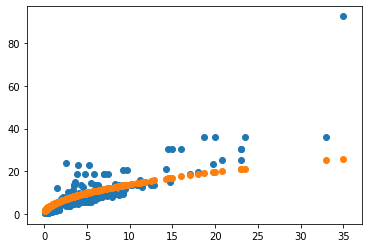

In [ ]:
plt.scatter(xdat,ydat)
plt.scatter(xdat,(anew*xdat)**(1/2))
plt.show()

In [ ]:
x=X_test
model=(anew*x)**(1/2)
for i,j in zip(Y_test,model):
    if i==j:
        print(Y_test,"  =====  ",model)
